In [1]:
import tensorflow as tf
from PIL import Image 
import numpy as np
import skimage
import skimage.io
import skimage.transform
from matplotlib.pyplot import imshow
%matplotlib inline  

/home/pranay360/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
synset = [l.strip() for l in open('synset.txt').readlines()]

def load_image(path):
    img = skimage.io.imread(path)
    imshow(Image.open(path,'r'))
    img = img / 255.0
    assert (0 <= img).all() and (img <= 1.0).all()
    #crop image from center
    short_edge = min(img.shape[:2])
    yy = int((img.shape[0] - short_edge) / 2)
    xx = int((img.shape[1] - short_edge) / 2)
    crop_img = img[yy : yy + short_edge, xx : xx + short_edge]
    resized_img = skimage.transform.resize(crop_img, (224, 224))
    return resized_img

def print_prob(prob):
    pred = np.argsort(prob)[::-1]
    top1 = synset[pred[0]]
    print "Top Prediction", top1
    top5 = map(synset.__getitem__, pred[:5])
    print "Top 5 Prediction: ", top5


In [3]:
with open('vgg16-20160129.tfmodel', 'rb') as f:
    fileContent = f.read()

graph_def = tf.GraphDef()
graph_def.ParseFromString(fileContent)
tf.import_graph_def(graph_def)
graph = tf.get_default_graph()
tensors = [n.name for n in tf.get_default_graph().as_graph_def().node]
print "graph loaded from disk"

graph loaded from disk


In [4]:
batch_size=1
def forward_pass(path):
    image = load_image(path)
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        batch = image.reshape((batch_size, 224, 224, 3))
        assert batch.shape == (batch_size, 224, 224, 3)
        feed_dict = {graph.get_tensor_by_name("import/images:0"): batch}
        prob_tensor = graph.get_tensor_by_name("import/prob:0") #1000 shape vector
        prob = sess.run(prob_tensor, feed_dict=feed_dict)
        
    print_prob(prob[0])

Top Prediction n02087046 toy terrier
Top 5 Prediction:  ['n02087046 toy terrier', 'n02107142 Doberman, Doberman pinscher', 'n02107312 miniature pinscher', 'n02089078 black-and-tan coonhound', 'n02106550 Rottweiler']


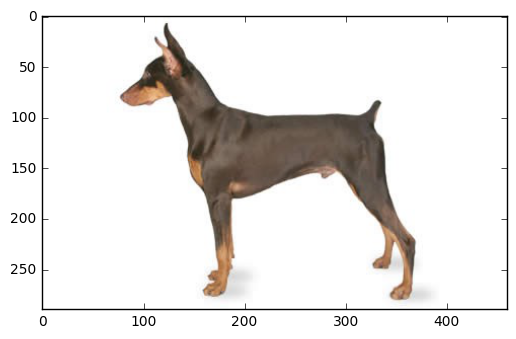

In [5]:
forward_pass("/home/pranay360/Image_Captioning/Images/dog2.jpg")

In [6]:
for ten in tensors[::-1][1:]:
    print ten, graph.get_tensor_by_name(ten+":0").get_shape()

import/prob (?, 1000)
import/fc8/BiasAdd (?, 1000)
import/fc8/MatMul (?, 1000)
import/fc8/bias (1000,)
import/fc8/weight (4096, 1000)
import/fc8/Reshape (?, 4096)
import/fc8/Reshape/shape (2,)
import/Relu_1 (?, 4096)
import/fc7/BiasAdd (?, 4096)
import/fc7/MatMul (?, 4096)
import/fc7/bias (4096,)
import/fc7/weight (4096, 4096)
import/fc7/Reshape (?, 4096)
import/fc7/Reshape/shape (2,)
import/Relu (?, 4096)
import/fc6/BiasAdd (?, 4096)
import/fc6/MatMul (?, 4096)
import/fc6/bias (4096,)
import/fc6/weight (25088, 4096)
import/fc6/Reshape (?, 25088)
import/fc6/Reshape/shape (2,)
import/pool5 (?, ?, ?, 512)
import/conv5_3/Relu (?, ?, ?, 512)
import/conv5_3/BiasAdd (?, ?, ?, 512)
import/conv5_3/bias (512,)
import/conv5_3/Conv2D (?, ?, ?, 512)
import/conv5_3/filter (3, 3, 512, 512)
import/conv5_2/Relu (?, ?, ?, 512)
import/conv5_2/BiasAdd (?, ?, ?, 512)
import/conv5_2/bias (512,)
import/conv5_2/Conv2D (?, ?, ?, 512)
import/conv5_2/filter (3, 3, 512, 512)
import/conv5_1/Relu (?, ?, ?, 512)
im